In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

100.0%


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw


102.8%


Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


112.7%
c:\users\user\ocr\new_env\lib\site-packages\torchvision\datasets\mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw
Processing...
Done!


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


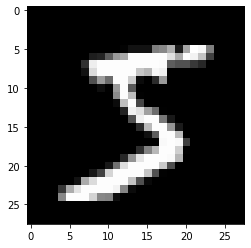

In [6]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [7]:
import torchvision.transforms as transforms

In [8]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


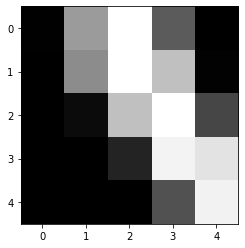

In [9]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [10]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [11]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)#can load in batches,shuffle set to true generalizez the model well
val_loader = DataLoader(val_ds, batch_size)#since the validation data loader is used only for evaluating the model, there is no need to shuffle the images.

In [12]:
import torch.nn as nn

input_size=28*28
num_classes=10

#linear regression model
model=nn.Linear(input_size,num_classes)#used to create the model

In [13]:
print(model.weight)
print(model.weight.shape)

Parameter containing:
tensor([[ 0.0306,  0.0112,  0.0031,  ...,  0.0045,  0.0313, -0.0334],
        [-0.0316,  0.0199, -0.0091,  ...,  0.0002, -0.0309,  0.0032],
        [ 0.0331,  0.0336,  0.0066,  ..., -0.0145,  0.0022,  0.0120],
        ...,
        [ 0.0231, -0.0313, -0.0034,  ...,  0.0295,  0.0226, -0.0072],
        [-0.0087,  0.0135,  0.0033,  ...,  0.0079,  0.0079,  0.0002],
        [ 0.0265,  0.0349, -0.0203,  ...,  0.0345,  0.0202, -0.0030]],
       requires_grad=True)
torch.Size([10, 784])


In [14]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0069,  0.0232, -0.0146,  0.0352,  0.0026, -0.0239,  0.0044, -0.0026,
        -0.0289, -0.0238], requires_grad=True)


In [23]:
#extend the nn.Module class from PyTorch to define a custom model.

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear=nn.Linear(input_size,num_classes)#creating the model
    def forward(self,xb):
        xb=xb.reshape(-1,784)#resizing the data
        out=self.Linear(xb)
        return out

In [24]:
model=MnistModel()

In [25]:
print(model.Linear)
print(model.Linear.weight.shape,model.Linear.bias.shape)

Linear(in_features=784, out_features=10, bias=True)
torch.Size([10, 784]) torch.Size([10])


In [27]:
for images,labels in train_loader:
    print(images.shape)
    outputs=model(images)
    break
print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)    

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.3617, -0.0714,  0.0337, -0.2477,  0.4161, -0.1484,  0.0446,  0.2096,
          0.0927,  0.2562],
        [ 0.1439,  0.0963,  0.0257, -0.1697,  0.0675, -0.0586, -0.0103,  0.2288,
         -0.2324,  0.1992]])


In [28]:
import torch.nn.functional as F

In [30]:
# Apply softmax for each output row
prob=F.softmax(outputs,dim=1)#converting the logits to range between probability 0 to 1 using softwmax function
print(prob.data[:2])

tensor([[0.0664, 0.0888, 0.0986, 0.0744, 0.1445, 0.0822, 0.0997, 0.1176, 0.1046,
         0.1232],
        [0.1110, 0.1059, 0.0987, 0.0812, 0.1029, 0.0907, 0.0952, 0.1209, 0.0762,
         0.1174]])


In [33]:
print(torch.sum(prob[0]).item())

1.0


In [34]:
#to compute binary cross entropy loss(ypred,ytrue)=-summation on i training samples (ytrue)* log(ypred)

loss_func=F.cross_entropy(outputs,labels)

In [35]:
print(loss_func)

tensor(2.3591, grad_fn=<NllLossBackward>)


In [36]:
#extend the nn.Module class from PyTorch to define a custom model.

class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.Linear=nn.Linear(input_size,num_classes)#creating the model
    def forward(self,xb):
        xb=xb.reshape(-1,784)#reshaping the data
        out=self.Linear(xb)
        return out
    def training_step(self, batch):
        images,labels=batch
        out=self(images) 
        loss=F.cross_entropy(out,labels)#generate predictions and calculate loss function
        return loss
    def validation_step(self, batch):
        images,labels=batch
        out=self(images) 
        loss=F.cross_entropy(out,labels)#generate predictions and calculate accuracy
        acc=accuracy(out,labels)
        return {'val_loss':loss,'val_acc':acc}
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()
        
    

In [37]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [41]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [42]:
#The fit function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)#generate pred and calc loss
            loss.backward()#compute gradient
            optimizer.step()#update weigts
            optimizer.zero_grad()#reset grad
        
        # Validation phase
        result = evaluate(model, val_loader)#generate pred and cal validation acc
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [43]:
history1 = fit(5, 0.001, model, train_loader, val_loader)#trained for 5 epochs,LR=0.001

Epoch [0], val_loss: 1.6779, val_acc: 0.7485
Epoch [1], val_loss: 1.4774, val_acc: 0.7767
Epoch [2], val_loss: 1.3259, val_acc: 0.7931
Epoch [3], val_loss: 1.2091, val_acc: 0.8032
Epoch [4], val_loss: 1.1174, val_acc: 0.8118


In [46]:
history2 = fit(10, 0.0001, model, train_loader, val_loader)#trained for 5 epochs,LR=0.001

Epoch [0], val_loss: 1.0372, val_acc: 0.8176
Epoch [1], val_loss: 1.0308, val_acc: 0.8179
Epoch [2], val_loss: 1.0244, val_acc: 0.8182
Epoch [3], val_loss: 1.0182, val_acc: 0.8185
Epoch [4], val_loss: 1.0122, val_acc: 0.8189
Epoch [5], val_loss: 1.0062, val_acc: 0.8193
Epoch [6], val_loss: 1.0004, val_acc: 0.8198
Epoch [7], val_loss: 0.9946, val_acc: 0.8204
Epoch [8], val_loss: 0.9890, val_acc: 0.8209
Epoch [9], val_loss: 0.9835, val_acc: 0.8216


In [47]:
result0 = evaluate(model, val_loader)
print(result0)

{'val_loss': 0.9834649562835693, 'val_acc': 0.8215981125831604}


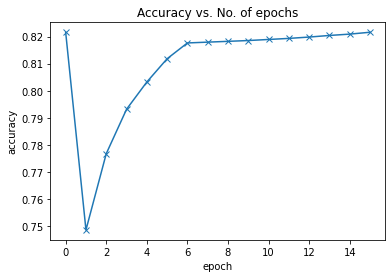

In [48]:
history = [result0] + history1 + history2
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [49]:
#Testing with individual images

test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

torch.Size([1, 28, 28])
Shape: torch.Size([1, 28, 28])
Label: 4


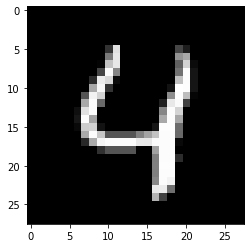

In [51]:
#display of image
img, label = test_dataset[4]
print(img.shape)
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [52]:
# overall loss and accuracy of the model on the test set
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.9573124647140503, 'val_acc': 0.8306640386581421}

In [53]:
#saving and loading the model for later use
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [54]:
print(model.state_dict())#ordereddict enclosing weigths and bias matrices

OrderedDict([('Linear.weight', tensor([[-0.0176,  0.0138,  0.0115,  ..., -0.0255, -0.0177,  0.0220],
        [ 0.0167, -0.0219,  0.0009,  ..., -0.0057,  0.0025,  0.0177],
        [ 0.0327,  0.0104,  0.0259,  ..., -0.0037,  0.0287, -0.0126],
        ...,
        [ 0.0065,  0.0181,  0.0113,  ...,  0.0179,  0.0172, -0.0027],
        [-0.0257,  0.0120, -0.0088,  ...,  0.0270,  0.0114,  0.0155],
        [ 0.0219, -0.0293, -0.0017,  ..., -0.0306,  0.0206,  0.0089]])), ('Linear.bias', tensor([-0.0344,  0.0220,  0.0185,  0.0025,  0.0356, -0.0216,  0.0193,  0.0220,
        -0.0290, -0.0254]))])


In [56]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('Linear.weight',
              tensor([[-0.0176,  0.0138,  0.0115,  ..., -0.0255, -0.0177,  0.0220],
                      [ 0.0167, -0.0219,  0.0009,  ..., -0.0057,  0.0025,  0.0177],
                      [ 0.0327,  0.0104,  0.0259,  ..., -0.0037,  0.0287, -0.0126],
                      ...,
                      [ 0.0065,  0.0181,  0.0113,  ...,  0.0179,  0.0172, -0.0027],
                      [-0.0257,  0.0120, -0.0088,  ...,  0.0270,  0.0114,  0.0155],
                      [ 0.0219, -0.0293, -0.0017,  ..., -0.0306,  0.0206,  0.0089]])),
             ('Linear.bias',
              tensor([-0.0344,  0.0220,  0.0185,  0.0025,  0.0356, -0.0216,  0.0193,  0.0220,
                      -0.0290, -0.0254]))])

In [59]:
model2 = MnistModel()

test_loader = DataLoader(test_dataset, batch_size=512)
result = evaluate(model2, test_loader)
print(result)

{'val_loss': 2.319120168685913, 'val_acc': 0.09396254271268845}
